In [1]:
import glob
import imageio as io
import matplotlib.pyplot as plt
import keras
from keras import backend as K
import numpy as np
import cv2
import os
%matplotlib inline 

In [2]:
index = '0'
smooth = 1.

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

def normalize(I):
    I = I.astype('float32')
    I -= I.mean()
    I /= I.std()
    return I


model = keras.models.load_model('keras_moving_trained_model'+index+'.h5', custom_objects={'dice_coef_loss': dice_coef_loss,'dice_coef': dice_coef})

def getEdgeImage(I):
    sz = I.shape
    In = normalize(I)
    Y = np.zeros([int(2**np.ceil(np.log2(sz[0]))),int(2**np.ceil(np.log2(sz[1])))])
    Y[0:sz[0],0:sz[1]] = In
    szBig = Y.shape
    x = Y.reshape([1, szBig[0], szBig[1], 1])
    res = model.predict(x)
    D = res.reshape([res.shape[1], res.shape[2]]) > 0.5
    D = D[0:sz[0],0:sz[1]]
    return D

folder = 'FinalImages'
files = glob.glob(folder + '/*.png')

outFolder = folder + '/Res'
if not os.path.isdir(outFolder):
    os.mkdir(outFolder)


FinalImages\1.png


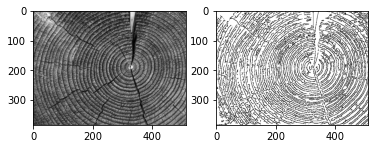

In [3]:
imgIdx = 0
file = files[imgIdx]
print(file)
I = io.imread(file)
E = getEdgeImage(I)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(I,'gray')
plt.subplot(1, 2, 2)
E = 1-E
plt.imshow(E, 'gray')
fileName = file.split('\\')[-1].split('.')[-2]
cv2.imwrite(os.path.join(outFolder,fileName + '_Res.png'), 255*E)
plt.show()